In [118]:
print('Meu nome é: Gabriel Moraes Barros ')
print('Meu RA é: 192801')

Meu nome é: Gabriel Moraes Barros 
Meu RA é: 192801


# Tutorial do Kaggle sobre Data Science e a competição do Titanic.

In [119]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#Confimar que pasta você está
!pwd
!ls

/home/gabriel/Dropbox/Campinas/Redes_Convolucionais/Task 4
gender_submission.csv  my_titanic_kaggle.ipynb	test.csv  train.csv


## Getting the data as a pandas dataframe

In [121]:
train_df = pd.read_csv('./train.csv')
print(train_df.shape)
test_df = pd.read_csv('./test.csv')
print(test_df.shape)
combine = [train_df, test_df]

(891, 12)
(418, 11)


In [122]:
test_df.head(n=3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Which features are available in the dataset?

In [123]:
print(train_df.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [124]:
# preview the data
print(train_df.shape)
train_df.head(n=3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


É possível notar que há 12 colunas nos dados, sendo:

PassengerID = valor-chave de cada usuário;

### Dados categóricos: 

Survived = y = Resulado binário (1 caso tenha sobrevivido e 0 caso tenha morrido).

Sex = Male e Female.

Embarked = Cidade em que embarcou

Pclass = classe em que ele embarcou. (<b>Aqui está dizendo que é um atributo categórico ordinal</b>)

### Dados numéricos:

<b>Continuous</b>
Age : Idade
Fare: Tarifa paga
<b>Discrete</b>

Ticket: número do ingresso

Cabin: quarto em que estava

Parch: número de pais

## Which features contain blank, null or empty values?

In [125]:
print("Info for the training set")
train_df.info()
print('')
print('Info for the test set')
test_df.info()


Info for the training set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

Info for the test set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 

## Analyze by pivoting features

Vamos bater algumas variaveis com outras e ver qual a correlação com a variável result (y) <b>Survived</b>.


In [126]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [127]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [128]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False).head(n=3)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000


In [129]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False).head(n=3)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395


## Pre-processamento: 

## Cleaning data

### 1) Tirar Ticket e Cabin


In [130]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)
train_df.columns
#train_df = train_df.drop(['Ticket','Cabin'], 1)
train_df = train_df.drop(['Ticket', 'Cabin'],axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'],axis=1)
combine = [train_df, test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing (Titles);

<b>Aqui eu peguei uma dica de um Kernel do Kaggle, onde ele tira os Titles, do atributo Name da planilha.</b>

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. 

The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.

The expand=False flag returns a DataFrame.

In [131]:
name_df = train_df[["Name"]]
name_df.head(n=10)


,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [132]:
for dataset in combine:
    #Arranca uma string começando em ", + space" e acabando em ".", com todas as combinações de letras dentro.
    dataset['Title'] = dataset.Name.str.extract(', ([A-Za-z]+)\.', expand=False)
    
title_df = train_df[["Title"]]
title_df.head(n=10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


### Analizando a quantidade de titles encontradas.

In [133]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


## Separando os títulos.

Para não ficar com muitas features, separamos os títulos mais comuns e os outros foram colocados num 
grupo só.


In [134]:

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()



,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182


Agora vamos fazer um tipo de one-hot, passando estas strings para inteiros representativos.

In [135]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


### Podemos enfim tirar os labels de Passenger ID e Name.

In [136]:
print(train_df.shape)
print(test_df.shape)
train_df = train_df.drop(['PassengerId', 'Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
train_df.shape, test_df.shape


(891, 11)
(418, 10)


((891, 9), (418, 9))

In [137]:
combine = [train_df, test_df]
print(train_df.shape, test_df.shape, len(combine))
train_df.head()


(891, 9) (418, 9) 2


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,3.0
2,1,3,female,26.0,0,0,7.9250,S,2.0
3,1,1,female,35.0,1,0,53.1000,S,3.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


### Continuamos passando so dados categóricos para numéricos

Na feature 'Sex', male = 0 e female = 1

In [138]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [139]:
train_df.head(n=3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0



## Completing a numerical continuous feature

Essa parte eu me baseei também no kernel do Kaggle, onde foi utilizado um método para completar valores faltantes continuos com dados que façam sentido. Como tinha sido notado correlação entre "Age", "Gender" e "Pclass", a idade foi  estimada escolhendo conjuntos de "Pclass" e "Gender" combinações. 

Logo, será usado a idade mediana para Pclass = 1 e Gender = 0, Pclass = 1, Gender = 1, sucessivamente.

Apesar de ser um método um pouco não trivial, me pareceu o mais interessante dos que eu pequisei.

Source:
https://www.kaggle.com/startupsci/titanic-data-science-solutions

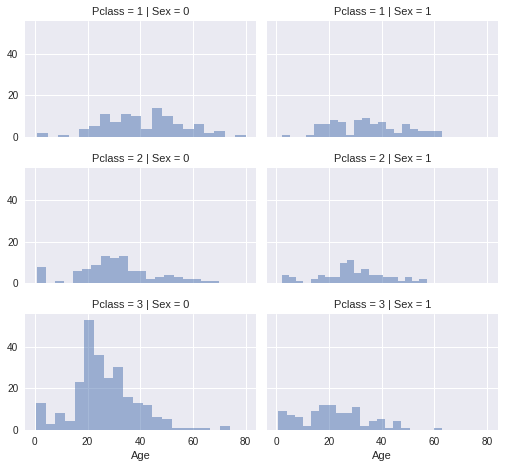

In [140]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.


In [141]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [142]:

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1.0
1,1,1,1,38,1,0,71.2833,C,3.0
2,1,3,1,26,0,0,7.9250,S,2.0
3,1,1,1,35,1,0,53.1000,S,3.0
4,0,3,0,35,0,0,8.0500,S,1.0


## FIM DO MÉTODO DE IMPUTAÇÃO DE DADOS FALTANTES, BASEADOS NO SITE:
https://www.kaggle.com/startupsci/titanic-data-science-solutions

### Criar faixas de idade.

Seguimos na criação das "bands", faixas de valores criados para cada feature, pelo que foi lido no Slack da turma, é o que o pessoal está usando com melhores resultados.

Let us create Age bands and determine correlations with Survived


In [143]:
#Faz uma coluna chamada Ageband que ´e a coluna Age cortada em 5

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

Determinando a correlação com "Survived".

In [144]:
#Testa a correlação de Ageband com Survived
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Fazendo uma espécie de one-hot, passando as faixas de Age para categóricos ordinais.


In [145]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3.0,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3.0,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]"


In [146]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head(n=3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1.0
1,1,1,1,2,1,0,71.2833,C,3.0
2,1,3,1,1,0,0,7.9250,S,2.0



### Criando uma feature chamada "FamiliSize", combinação de "Parch" e "SibSp"



In [147]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False).head(4)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333


In [148]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1.0,2
1,1,1,1,2,1,0,71.2833,C,3.0,2
2,1,3,1,1,0,0,7.9250,S,2.0,1


In [149]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]
train_df.head(n=3)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,S,1.0,2
1,1,1,1,2,71.2833,C,3.0,2
2,1,3,1,1,7.9250,S,2.0,1


### Criando outro feature, "IsAlone".

Esse feature eu também dei uma olhada em outros kernels do Kaggle, inclusive uns em R, e todos usavam este artifício. Como a minha acuracácia 
estava preza em 79%, tentei utilizar.


In [150]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [151]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1.0,2,0
1,1,1,1,2,71.2833,C,3.0,2,0
2,1,3,1,1,7.9250,S,2.0,1,1


In [152]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'FamilySize', 'IsAlone'],
      dtype='object')


### Completando a feature categorial "Embarked" com o valor mais comum

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.


In [153]:
#Descobre qual valor mais comum na coluna
freq_port = train_df.Embarked.dropna().mode()[0]
print(freq_port)


S


In [154]:
#Substitui dados faltantes
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
print('Done')

Done



### Convertendo um feature categorical para numérico

Apenas trocando as strings 'S', 'Q' e 'C' para valores cardinais.

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head(4)

### Completando a feature "Fare" com a medianaa e transformando-a em "bands"


In [157]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,7.8292,2,1,1,1
1,893,3,1,2,7.0000,0,3,2,0
2,894,2,0,3,9.6875,2,1,1,1
3,895,3,0,1,8.6625,0,1,1,1
4,896,3,1,1,12.2875,0,3,3,0


In [158]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081




Convert the Fare feature to ordinal values based on the FareBand.


In [159]:

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(5)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0,0,1.0,2,0
1,1,1,1,2,3,1,3.0,2,0
2,1,3,1,1,1,0,2.0,1,1
3,1,1,1,2,3,0,3.0,2,0
4,0,3,0,2,1,0,1.0,1,1


## Vendo se os dados estão normalizados

In [160]:
#train_df[:, train_df.columns != 'Survived'].head(n=3)
#df.ix[:, df.columns != 'b']
train_df.drop('Survived', axis=1).head(n=3)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,3,0,1,0,0,1.0,2,0
1,1,1,2,3,1,3.0,2,0
2,3,1,1,1,0,2.0,1,1


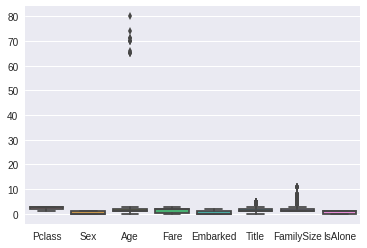

In [161]:

import seaborn as sns
sns.boxplot(data=train_df.drop('Survived', axis=1));

### Obs:

Analisando o gráfico, talvez seja interessante dar uma normalizada na Idade antes de transformar ela em bands.


## Passando os dados para vetores numpy

In [162]:
train_df.head(n=3)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,0,0,1.0,2,0
1,1,1,1,2,3,1,3.0,2,0
2,1,3,1,1,1,0,2.0,1,1


In [163]:
test_df.head(n=3)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,2,1,1,1
1,893,3,1,2,0,0,3,2,0
2,894,2,0,3,1,2,1,1,1


In [164]:
train_np = np.asarray(train_df)
test_np = np.asarray(test_df)
np_x_train = train_np[:,1:]
np_y_train = train_np[:,0]
np_x_test = test_np[:,1:]
print('np_x_train shape', np_x_train.shape)
print('np_y_train shape', np_y_train.shape)
print('np_x_test shape',np_x_test.shape)

np_x_train shape (891, 8)
np_y_train shape (891,)
np_x_test shape (418, 8)


## Iniciando o modelo de redes neurais


In [165]:
#Imports do keras
import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
from keras.callbacks import Callback
from IPython import display

Criando um split de train e test, para testarmos a acurácia de algumas mudanças nos parâmetros.

In [166]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_x_train, np_y_train, train_size=0.8,random_state=1)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)

(179, 8)
(179,)
(712, 8)


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.core import Dense, Dropout, Activation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
def build_model(X_train, y_train):
    input_dim = np_x_train.shape[1]
    m = Sequential()
    m.add(Dense(input_dim=input_dim, units=128, kernel_initializer="glorot_uniform"))
    m.add(Activation("relu"))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))

    m.add(Dense(units=128, kernel_initializer="glorot_uniform"))
    m.add(Activation("relu"))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))

    m.add(Dense(units=128, kernel_initializer="glorot_uniform"))
    m.add(Activation("relu"))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))

    m.add(Dense(units=128, kernel_initializer="glorot_uniform"))
    m.add(Activation("relu"))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))

    m.add(Dense(units=128, kernel_initializer="glorot_uniform"))
    m.add(Activation("relu"))
    m.add(BatchNormalization())
    m.add(Dropout(0.5))
    m.add(Dense(activation="softmax", units=2))
    
    sgd = SGD(lr=0.001)
    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #m.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return m
RANDOM_STATE = 1 
y_train_binary = to_categorical(y_train)
print('y_train binary shape',y_train_binary.shape)
print('np_x_train shape', np_x_train.shape)
model = build_model(X_train, y_train_binary)

print("Here we go")
model.fit(X_train, y_train_binary,epochs=500, batch_size=35, verbose=0)
print("Done")

In [220]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               1152      
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 128)               512       
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
__________

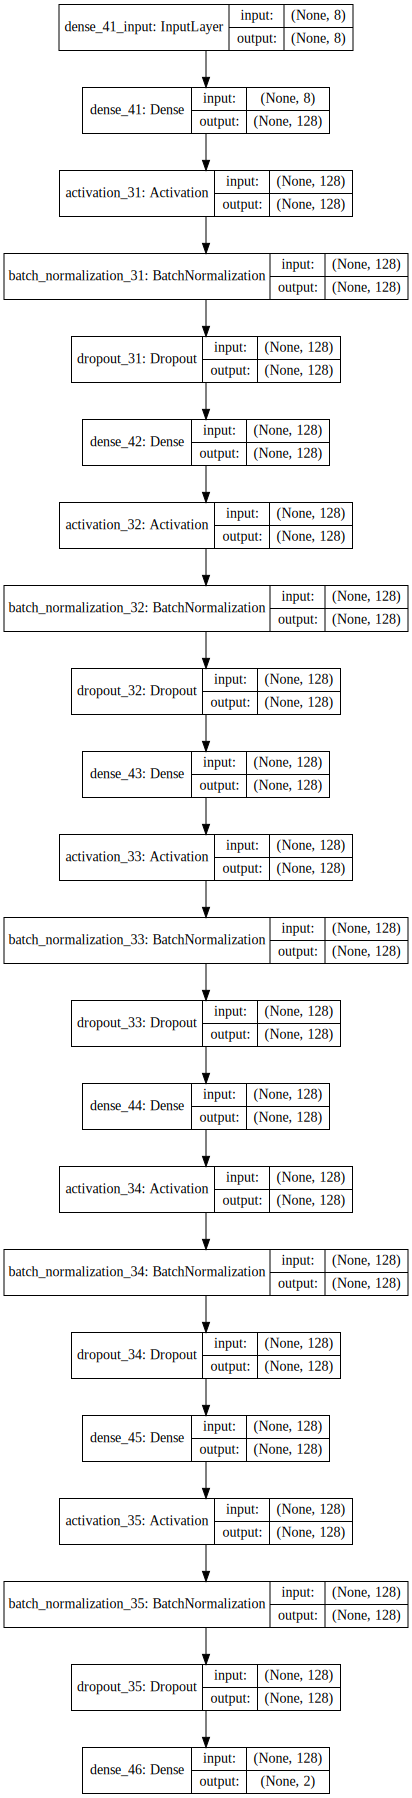

In [222]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,rankdir='TB').create(prog='dot', format='svg'))

In [234]:
y_test_binary = to_categorical(y_test)
print(X_test.shape)
loss, accuracy = model.evaluate(X_test,y_test_binary, batch_size=128, verbose=1)
print("\n[INFO] accuracy on the test data set: {:.2f}%".format(accuracy*100))
print('Final loss:',loss)


(179, 8)
128/179 [====================>.........] - ETA: 0s
[INFO] accuracy on the test data set: 78.77%
Final loss: 0.508943382921


In [237]:
print('Matriz de confusão:')
y_pred_test = model.predict_classes(X_test)
pd.crosstab(y_pred_test, y_test)

Matriz de confusão:
 32/179 [====>.........................] - ETA: 0s

col_0,0,1
row_0,,
0,93,25
1,13,48


## Fazendo o fit para o conjunto inteiro

In [242]:
y_train_binary = to_categorical(np_y_train)
print('y_train binary shape',y_train_binary.shape)
print('np_x_train shape', np_x_train.shape)
model = build_model(np_x_train, y_train_binary)
print("Here we go")
model.fit(np_x_train, y_train_binary,epochs=1000, batch_size=35, verbose=0)
print("Done")

y_train binary shape (891, 2)
np_x_train shape (891, 8)
Here we go
Done


# Submetendo para o Kaggle

In [283]:
predictions = np.round(model.predict(np_x_test))
y_pred_test = model.predict_classes(np_x_test)
print('Done!')
predictions = pd.DataFrame(y_pred_test)
predictions.head()

288/418 [===================>..........] - ETA: 0sDone!


,0
0,0
1,1
2,0
3,0
4,1


In [284]:
id_df = pd.read_csv('./test.csv')
id_df.head(n=3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [286]:
result = pd.concat([id_df[["PassengerId"]], predictions], axis = 1)
result.head(n=10)

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [287]:
#result = result.set_index(['PassengerId', "Survived"])
result.columns
result.columns = [
  'PassengerId',
  'Survived'
]
result.head(n=5)



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Compara como a matriz deve ser

In [288]:
gender_df = pd.read_csv('./gender_submission.csv')
gender_df.shape
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [289]:
result.to_csv("./result_try.csv", index=False)

In [290]:
!ls
!pwd
#!nemo .

gender_submission.csv	 result_try.csv  train.csv
my_titanic_kaggle.ipynb  test.csv
/home/gabriel/Dropbox/Campinas/Redes_Convolucionais/Task 4
